# Discord Emote Data Freaks
by Dennis Wang

This project is intended to be a data visualization exercise for emote usage by a certain Discord server. Quantitative measures of interest include total frequency of each emote and frequency/day usage of that emote since its addition to the server. The results of this project would be used to better inform the decision as to which emojis will be purged from the Discord server due to limited emote slots.

Data collected and cleaned by Elias on 1/31/2021.

## Data Collection and Cleaning
Data on the frequency of each emote was collected by recording the number of search results in Discord's search function for that particular emote's ID.

Frequency per day was then calculated by dividing total frequency by the number of days since adding that emote.

## Importing packages and data

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

emotes = pd.read_csv('Emotes.csv')
emotes.head()

,Emote,Usage,Month Added,Current Month,Days,Usage/Day
0,:edwardu:,1128,Nov 2020,Feb 2021,92,12.26
1,:kek:,1744,Aug 2020,Feb 2021,184,9.48
2,:killme:,368,Dec 2020,Feb 2021,62,5.94
3,:pepewoah:,364,Nov 2020,Feb 2021,92,3.96
4,:mekill:,197,Dec 2020,Feb 2021,62,3.18


## Barchart of Total Usage

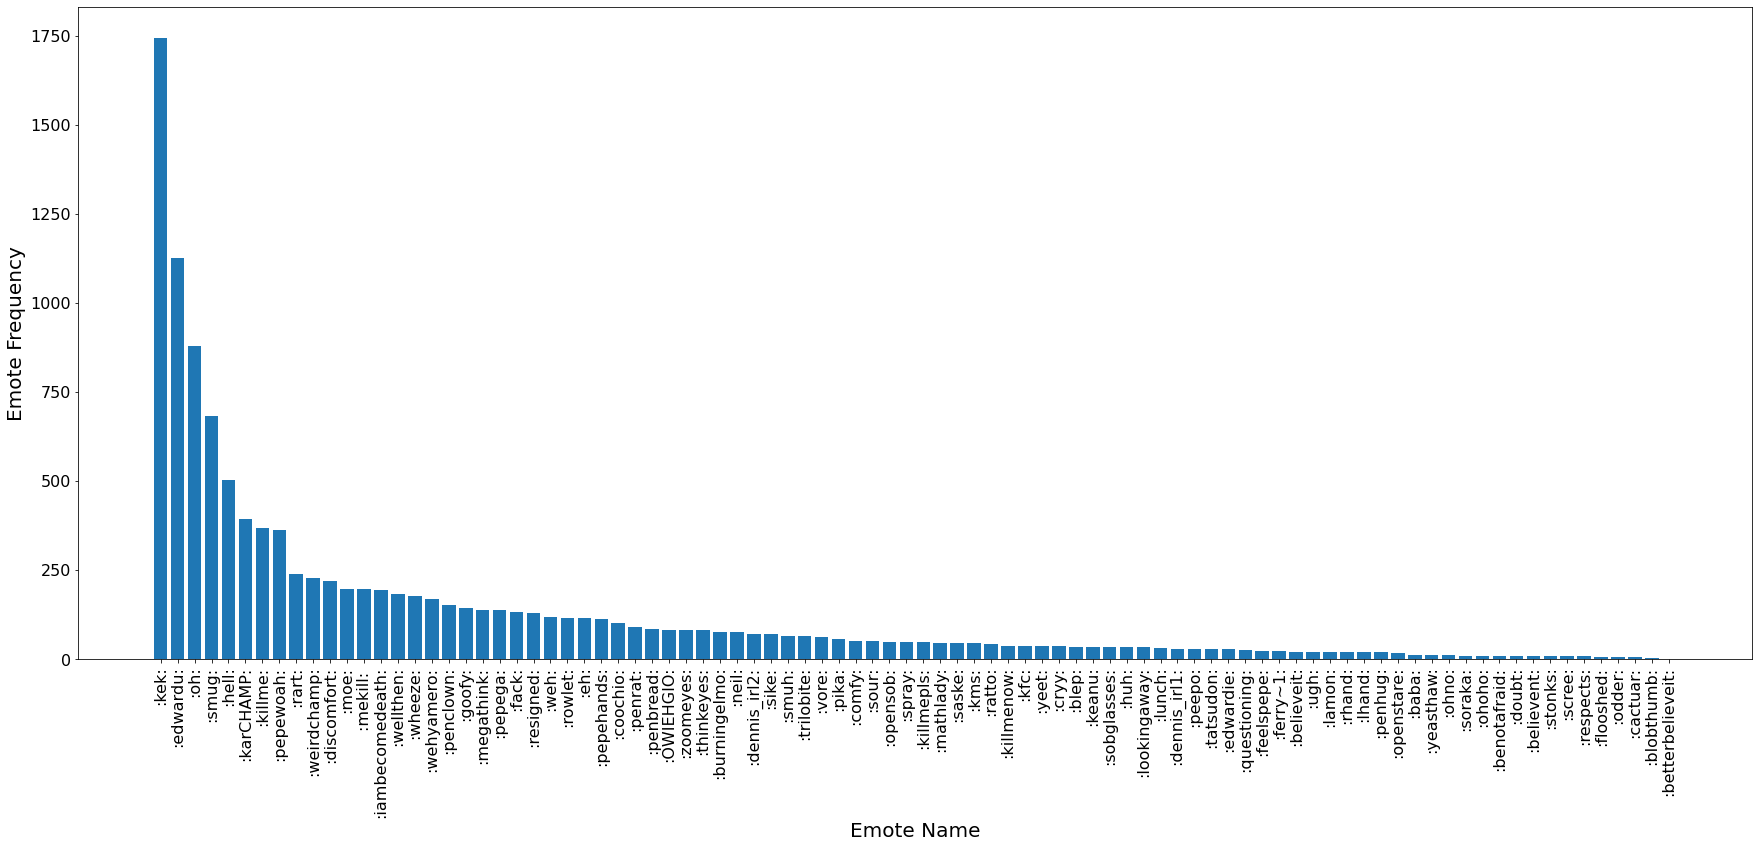

In [12]:
emotes_total_usage = emotes.sort_values('Usage', ascending=False)
plt.figure(figsize=(30,12))
plt.bar(emotes_total_usage['Emote'], emotes_total_usage['Usage'])
plt.xlabel('Emote Name', fontsize=20)
plt.ylabel('Emote Frequency', fontsize=20)
plt.xticks(rotation='vertical', fontsize = 16)
plt.yticks(fontsize = 16)

# saving as image
plt.savefig('emote_freq_barplot')

plt.show()

We can see that the bottom five emotes in terms of total usage are :betterbelieveit:, :blobthumb:, :cactuar:, :odder:, and :flooshed:. However, since this in terms of total usage, it doesn't account for when the emotes were added. Emotes that were added later are likely to have less total usage simply because they are newer. Therefore, looking at the Usage/Day since added may be a much more useful metric to decide which emotes to cut.

## Barchart of Usage per Day

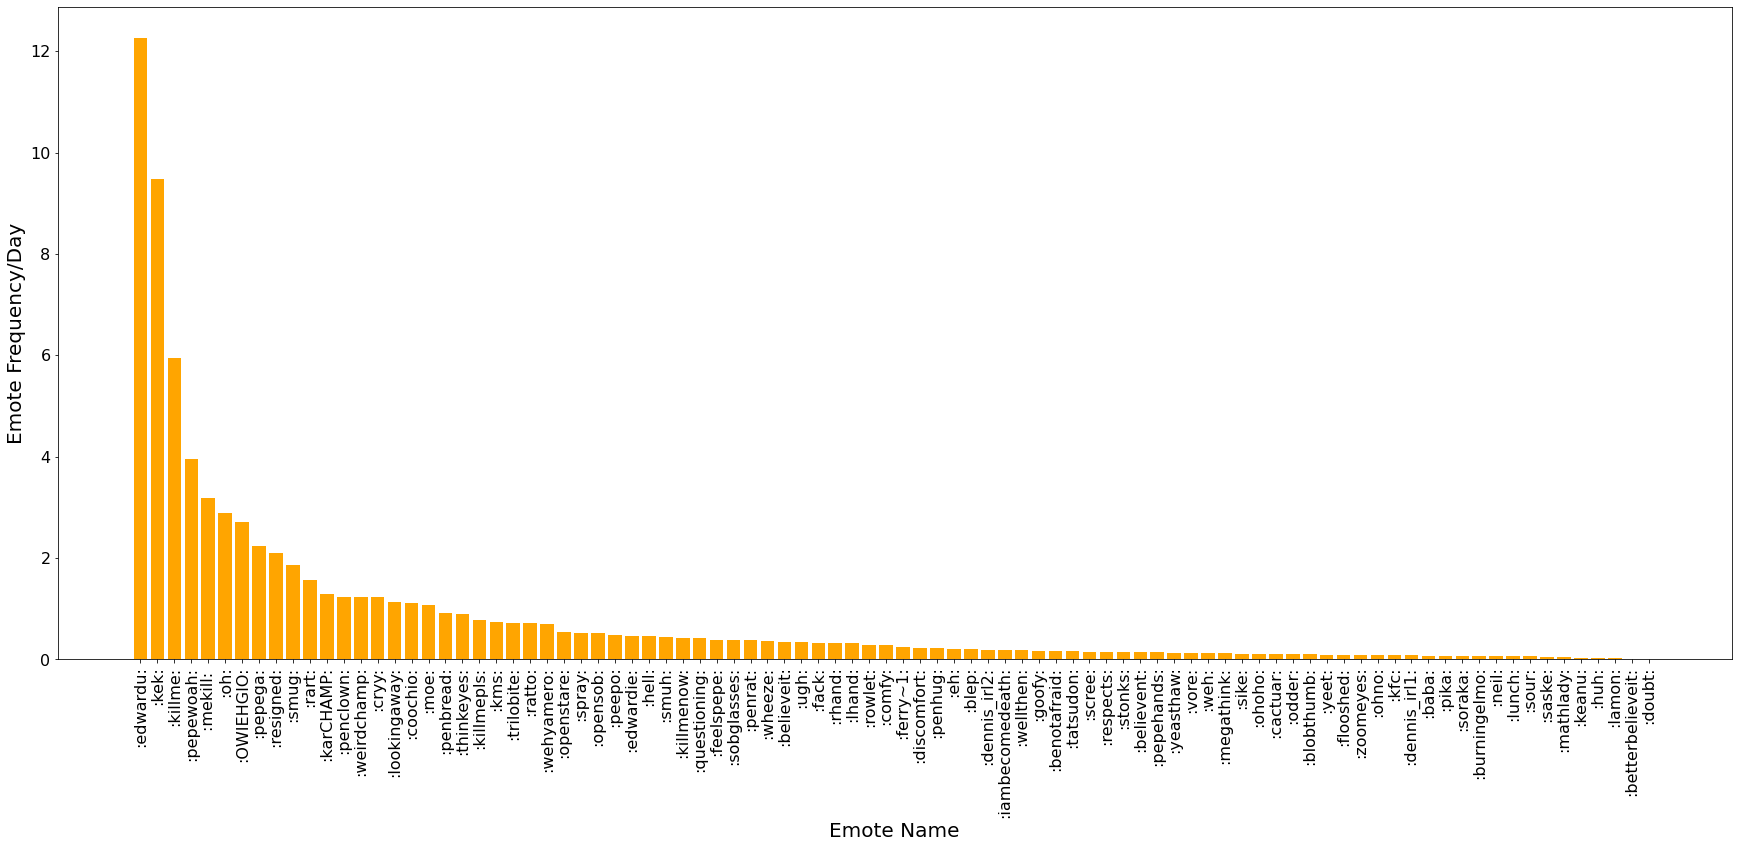

In [13]:
emotes_day_usage = emotes.sort_values('Usage/Day', ascending=False)
plt.figure(figsize=(30,12))
plt.bar(emotes_day_usage['Emote'], emotes_day_usage['Usage/Day'], color='orange')
plt.xlabel('Emote Name', fontsize = 20)
plt.ylabel('Emote Frequency/Day', fontsize = 20)
plt.xticks(rotation='vertical', fontsize = 16)
plt.yticks(fontsize = 16)

# saving as image
plt.savefig('emote_freq_day_barplot')

plt.show()

The five least used emotes in terms of Usage/Day are :doubt:, :betterbelieveit:, :lamon:, :huh:, and :keanu:. These emotes will likely be considered to be cut.

## Double Barchart of Total Freq and Freq/Day for Top 10 Emotes
Just as an exercise, we can try creating a double bar chart for our top 10 most relevant emotes.

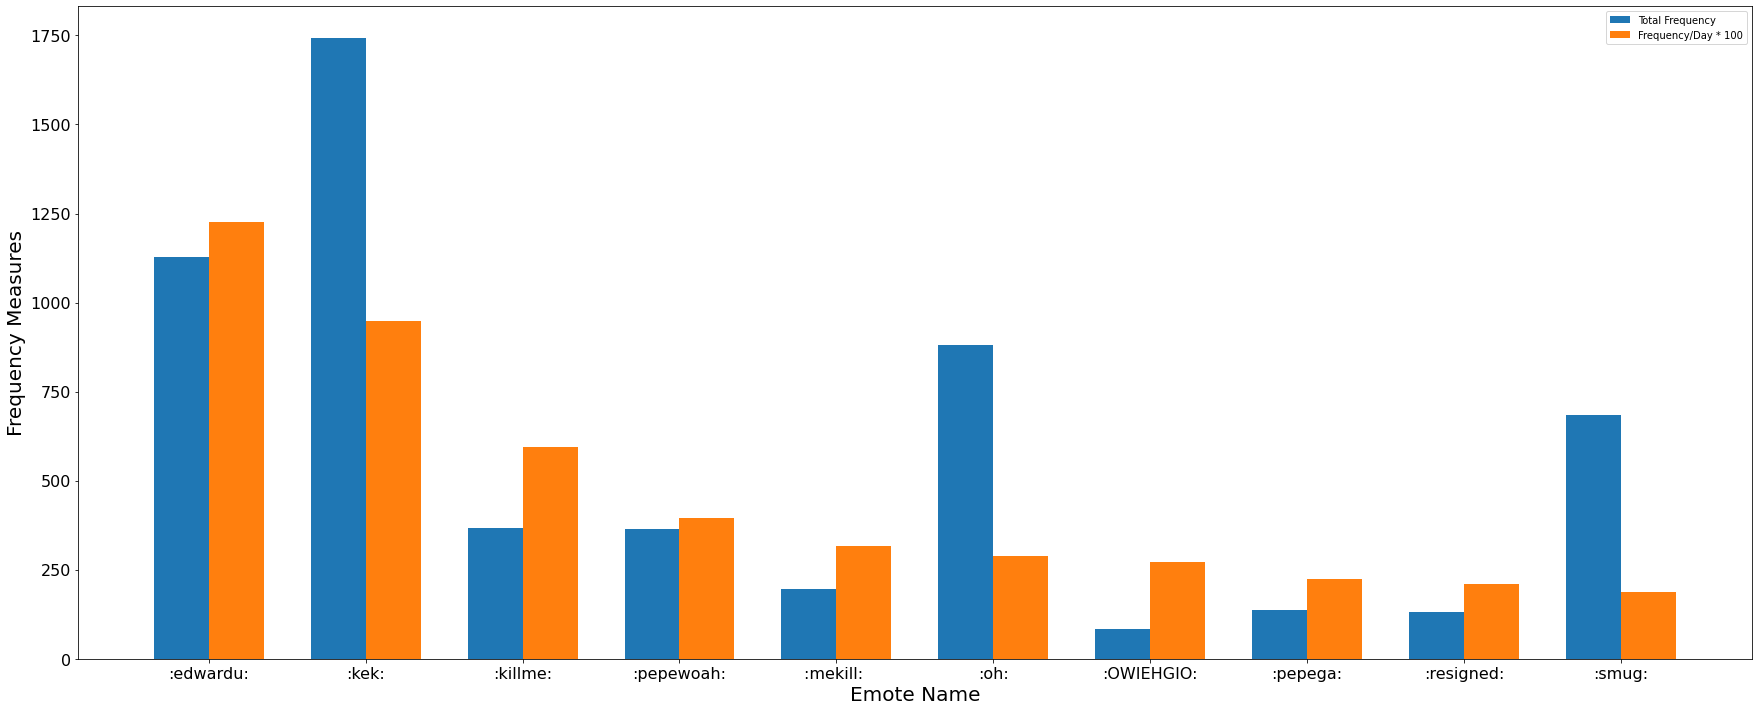

In [16]:
import numpy as np

fig, ax = plt.subplots(figsize=(30,12))

N = 10
width = 0.35
ind = np.arange(N)    # the x locations for the groups
p1 = ax.bar(ind, emotes.head(10)['Usage'], width, bottom = 0)
p2 = ax.bar(ind + width, emotes.head(10)['Usage/Day']*100, width, bottom = 0)

ax.set_xticks(ind + width / 2)
ax.set_xticklabels(emotes.head(10)['Emote'])

ax.legend((p1[0], p2[0]), ('Total Frequency', 'Frequency/Day * 100'))
ax.autoscale_view()

plt.xlabel('Emote Name', fontsize = 20)
plt.ylabel('Frequency Measures', fontsize = 20)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.show()

We can see that while :kek: has the highest total frequency, it only has the second highest frequency/day measure. 
:edwardu: holds the highest frequency/day indicating that it's more popular and will overtake :kek: in total frequency soon.

Other emotes like :smug: and :oh: have  high total frequency but low frequency/day, indicating that they're not as popular as they used to be.

## High Usage Frequency
Seaborn is a library for statistical visualization that is built on upon Matplotlib to make attractive statistical plots with ease. It works very well with Pandas so we can use seaborn to make some other interesting plots that might give us some more insights.

For example if we were just to look at the frequency of emote usage, we could use a histogram like this:


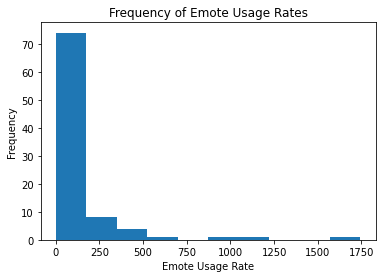

In [14]:
plt.hist(emotes["Usage"])
plt.xlabel("Emote Usage Rate")
plt.ylabel("Frequency")
plt.title("Frequency of Emote Usage Rates");

As we can see, the vast majority of the emotes added to the Discord server see little use. Only a select few emotes see extremely high frequency use.
An issue that can come from using histograms is the issue of "binning bias" -- where separating our data into different bins of data can slightly distort the shape of our data distribution. While this isn't necessarily an issue when there are a lot of data points, smaller datasets can look incredibly different depending on how the bins are determined. 

Other plots, such as swarmplots, can be used to try to remove the issue of binning bias. Seaborn's swarmplots work well with small-to-medium amounts of data, which is perfect for our dataset size of 90. 

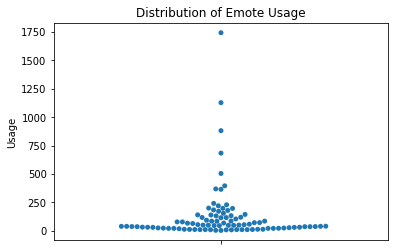

In [17]:
import seaborn as sns
sns.swarmplot(y="Usage", data=emotes)
plt.title("Distribution of Emote Usage");

The swarmplot shows a much more accurate shape of the distribution, and any binning bias has been reduced. We can actually count the number of emotes that have high usage rates. There are about 8 emotes that are clearly distinct in usage rate compared to the others. We can figure out which ones these are:

In [18]:
emotes.sort_values("Usage", ascending=False).head(8)

,Emote,Usage,Month Added,Current Month,Days,Usage/Day
1,:kek:,1744,Aug 2020,Feb 2021,184,9.48
0,:edwardu:,1128,Nov 2020,Feb 2021,92,12.26
5,:oh:,881,Apr 2020,Feb 2021,306,2.88
9,:smug:,683,Feb 2020,Feb 2021,366,1.87
30,:hell:,504,Feb 2018,Feb 2021,1096,0.46
11,:karCHAMP:,395,Apr 2020,Feb 2021,306,1.29
2,:killme:,368,Dec 2020,Feb 2021,62,5.94
3,:pepewoah:,364,Nov 2020,Feb 2021,92,3.96


We can see our top 8 distinctly most used emotes of all time here. However, :hell: is much older than the other emotes in the list, being the only emote added before 2020. We can try making a swarmplot of Usage/Day to better see which emotes are actually relevant today.

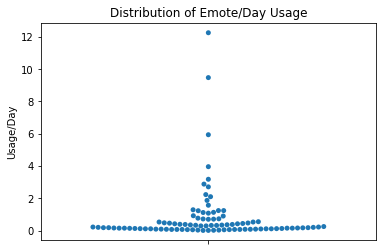

In [19]:
sns.swarmplot(y="Usage/Day", data=emotes)
plt.title("Distribution of Emote/Day Usage");

We can see that there is about three distinct emotes with high Usage/Day rate, showing that these are the most relevants used by the Discord server today. We can see which emotes these are:

In [20]:
emotes.sort_values(by="Usage/Day", ascending=False).head(3)

,Emote,Usage,Month Added,Current Month,Days,Usage/Day
0,:edwardu:,1128,Nov 2020,Feb 2021,92,12.26
1,:kek:,1744,Aug 2020,Feb 2021,184,9.48
2,:killme:,368,Dec 2020,Feb 2021,62,5.94


The three most distinctly frequently used emotes used in the Discord server today are :edwardu:, :kek:, and :killme:.

## Further Avenues of Exploration
Since each Discord message is timestamped, it should theoretically be possible to record emoji use per day (not averaged). 
This information could be used to observe how changes in emoji use can vary throughout the week (e.g. Mondays may have more :pensive:-related emojis
while Fridays may have more :pepewhoah:'s). We could also see how emoji use coincides with holidays and news events such as Christmas and President Biden's election win, respectively.

This data can be visualized through a linechart to emphasize change throughout time. In addition, the machine-learning models such as regression trees could be applied to predict the usage of certain emojis on certain days of the week.
Another method, Association Rules, can be used to see if certain emojis tend to be used in conjunction with each other.

While of course data collection is the biggest hurdle to this endeavor, coding a Discord bot to automatically collect these user metrics, while a challenge, could be another (related) exciting project to tackle.